# Modeling Swimmer Agents 
## Math 437 Capstone Project, Fall 2023
### Author: Christian Lentz

This file includes notes which describe and motivate my capstone project. The goal of this project will be to investigate numerical techniques for approximating solutions to PDEs, with a goal a building a simple agent based model which will describe how swimmers move through an encolsed, toroidial wave pool. The steps of this project are as follows: 

- Implement a PDE solver using finite differences to approximate solutions to the wave equation in two spatial dimensions. 
- Implement a PDE solver using Fourier spectral methods to approximate solutions to the wave equation in two spatial dimensions. 
- Build a front end GUI which animates solutions in an enclosed, toroidial environment. 
- Add simple swimmer agents to the wave environment. 

### 1. The Wave Equation

The wave equation is a second order partial differential equation which describes both traveling and standing waves as they occur in classical physics. The equation is particularly useful in modeling mechanical waves, such as sound waves, or electromagnetic waves, such as light waves. Note that the wave equation is not the same as the wave function, which is used in quantum mechanics to describe the quantum state of an isolated quantum system. 

Let $x$ be some $n$-dimensional vector $x = (x_1, x_2, \dots x_n)$, and suppose that $u(x,t)$ describes the displacement of a system from an initial rest position. The wave equation will describe the acceleration of this displacement over time. Specifically, the scalar form of the wave equation is

\begin{align*}
    \frac{\partial^2 u}{\partial t^2} &= c^2 (\frac{\partial^2 u}{\partial x_{1}^2} + \dots + \frac{\partial^2 u}{\partial x_{n}^2})
\end{align*}, 

where $c \in \mathbb{R^{>0}}$ is some scalar. The vectorized form can be written as 

\begin{align*}
    \frac{\partial^2 u}{\partial t^2} &= c^2 {\nabla}^2 u 
\end{align*}

The wave equation will be important to this project, as we will use finite difference and spectral methods to approximate solutions to the wave equation in order to build a model of an enclosed toroidial wave pool.  

### 2. Finite Differences

The finite differences method makes use of the definition of the derivative, or the difference quotient. However, rather than taking the limit, we will approximate solutions to the PDE at finitely many fixed points in time, hence why we call this finite differences. 

#### 2.1 A bit of Analysis

First, we recall the definition of the derivative. Suppose some function $f: E \rightarrow \mathbb{R}$ where $x_{0} \in E$ is a limit point of $E \subseteq \mathbb{R}$. We say that $f$ is differentiable at $x_{0}$ if the following limit exists: 

\begin{align*}
    lim_{x \rightarrow 0} &= \frac{f(x_0 + x)-f(x_0)}{x} 
\end{align*}

Equivalently, we may also write the difference quotient as: 

\begin{align*}
    lim_{x \rightarrow 0} &= \frac{f(x_0)-f(x_0 - x)}{x} 
\end{align*}

Writing the difference quotient in either of these forms will be useful in proving the difference quotient for the second derivative of a function. To make our definition above more concise, it is also useful to recall that if $x_0 \in E$ is a limit point, then: 

\begin{align*}
    \forall \epsilon > 0: \exists x \in E: 0 < |x - x_0| < \epsilon 
\end{align*}

In words, $E$ contains points which are arbitrarily close but not equal to $x_0$. This definition is the foundation of the finite differences approach. By manipulating the difference quotient, we can build a technique to approximte solutions to any ODE or PDE of any order. It is possible to do this since we can generalize the definition of the difference quotient to higher order derivatives as well. For our purpose, we will need to know the difference quotient for the second derivative of a function. 

$\textit{Claim:}$ Let $f: \mathbb{R} \rightarrow \mathbb{R}$ be differentiable and let $x_0 \in \mathbb{R}$. Further, suppose that $f''(x_0)$ exists. Then:

\begin{align*}
    f''(x_0) &= lim_{x \rightarrow 0} \frac{f(x_0 + x) + f(x_0 - x) - 2f(x_0)}{x^2}
\end{align*}

$\textit{Proof:}$ Since $f''(x_0)$ exists, it follows that: 

\begin{align*}
    f''(x_0) &= lim_{x \rightarrow 0} \frac{f'(x_0 + x) - f'(x_0)}{x} 
\end{align*}

Further, since $f$ is a differentiable function, then we have:

\begin{align*}
    f''(x_0) &= lim_{x \rightarrow 0} \frac{\frac{f(x_0 + x_1) - f(x_0)}{x_1} - \frac{f(x_0) - f(x_0 - x_2)}{x_2}}{x} \\
\end{align*}

Letting $x = x_1 = x_2$, then we may simplify to get the form stated in the claim, and this concludes the proof. 

Note that, in practice, we cannot interchange limits in this way, so writing this proof is an abuse of notation, but works for our purpose. A more rigorous proof of this fact would use the Cauchy Mean Value Theorem. 

#### 2.2 Finite Differences for the Wave Equation

Now that we have defined the difference quotient for the first and second derivative of a function, we can use these facts to build a method for approximating solutions to first or second order PDEs. Here, we outline our technique for the wave equation, and in the following section we inclulde an example of finite differences code for an advection-diffusion PDE. 

Consider the wave equation in two spatial dimensions $x$ and $y$: 

\begin{align*}
    \frac{\partial^2 u}{\partial t^2} &= c^2 (\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2})
\end{align*}

The first step of this process will be to write the PDE using the difference quotient. To make things a bit more intuitive, we will write the limits as $lim_{\Delta t \rightarrow 0}$, $lim_{\Delta x \rightarrow 0}$ and $lim_{\Delta y \rightarrow 0}$. Suppose that we let $x = a$, $y = b$ and $t = T$. Then we have:  

\begin{align*}
    lim_{\Delta t \rightarrow 0} \frac{u(a, b, T + \Delta t) + u(a, b, T - \Delta t) - 2u(a, b, T)}{(\Delta t)^2} = \dots\\
    \dots = c^2(lim_{\Delta x \rightarrow 0} \frac{u(a + \Delta x, b, T) + u(a - \Delta x, b, T) - 2u(a, b, T)}{(\Delta x)^2} + \dots \\
    \dots + lim_{\Delta y \rightarrow 0} \frac{u(a, b + \Delta y, T) + u(a, b - \Delta y, T) - 2u(a, b, T)}{(\Delta y)^2}) 
\end{align*}

By inspection, we see that this is quite easy to generalize to the $n$-dimensional case. Although this form is quite cumbersome, we can leverage it to numerically approximate solutions to the wave equation. The key insight is to ignore the limit, and let $u(a,b,T+\Delta t)$ be unknown. By doing this, we will be able to approximate solutions for fixed $t$ beyond our initial time $T$. Thus, we get something that looks like this:

\begin{align*}
    u(a, b, t + \Delta t) = \dots \\
    \dots = 2u(a,b,T) - u(a, b, T - \Delta t) + \dots \\ 
    \dots + \frac{c^2 (\Delta t)^2}{(\Delta x)^2} (u(a + \Delta x, b, T) + u(a - \Delta x, b, T) - 2u(a, b, T)) + \dots \\ 
    \dots + \frac{c^2 (\Delta t)^2}{(\Delta y)^2} (u(a, b + \Delta y, T) + u(a, b - \Delta y, T) - 2u(a, b, T)) 
\end{align*}

Using this equation, we can approximate solutions for our PDE. Note that our implementation will take a vectorized approach, meaning we will use separate arrays to store x and y coordinates. 

#### 2.3 Choosing $\Delta x$, $\Delta y$, and $\Delta t$

As a final note, we must take care when chooisng parameter values for $\Delta x$, $\Delta y$, and $\Delta t$ to assure the stability of our program. In certain cases, a poor choice for these parameters will result in our program producing incorrect solutions. 

Suppose a PDE with solutions of the form $u(x, t)$ where $x \in \mathbb{R}^n$ and $t \in \mathbb{R}$. Such a PDE can be thought of as an uncountably infinite function space, where at each $t \in \mathbb{R}$, we have a unique function describing a solution to the PDE. Numerical techniques for approximating solutions to PDEs, inclduing finite differences, will rely on a $\textit{discretization}$ of this function space.

Suppose that we wish to model our PDE over the time interval T = $[t_0, t_{max}]$. A discretization of the time variable will split this iterval into finitely many points by choosing some $\Delta t$. The cardinality of this disretized set is: 

\begin{align*}
    \frac{t_{max} - t_0}{\Delta t} 
\end{align*}

Once doing this, we proceed by approximating a solution at each time within this discretized set. However, we must also place a discretization on the spatial variables as well. Suppose that $x = (x_1, \dots, x_n)$, thus we must also choose some $\Delta x_1, \dots,\Delta x_n$ in order to transform the space through which our wave travels into a discretized grid. At a high level, we must choose these parameters such that $\Delta t$ is not too large as too allow the wave to travel to another coordinate within the grid within that interval of time. 

We can ensure proper selection of these parameters by adhering to the $\textit{CFL condition}$, which is commonly used with finite differences to model advection like processes. The condition states that for a PDE with spatial variables $x = (x_1, \dots, x_n)$ and temporal variable $t$, a discretization of these parameters must satisfy that 

\begin{align*}
    \Delta t (\sum_{i=1}^{n} \frac{u_{x_i}}{\Delta x_i}) \leq C
\end{align*}

where $C$ is a dimensionless constant and $u_{x_i}$ is the velocity of the wave with respect to $x_i$. We typically let $C = 1$. 

#### 2.4 A Finite Differences Example

The final section of this chapter has example code of finite differences in action. In this particular example, we model solutions to an advection-diffusion PDE with an approximately normal initial distribution. Each plot seen below shows a solution curve for the PDE at a fixed time. To see the finite differences code for this project, see the file $\textit{FiniteDiff.py}$. 

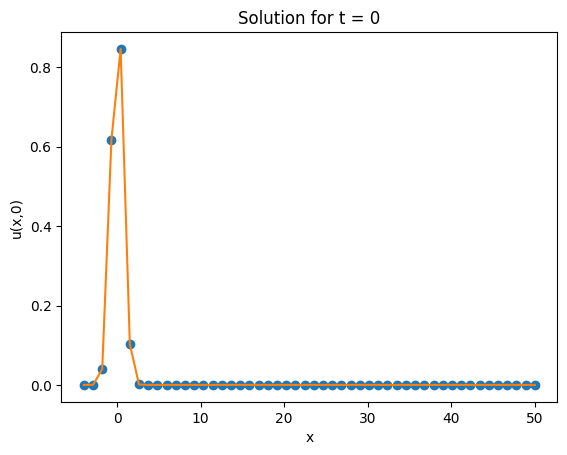

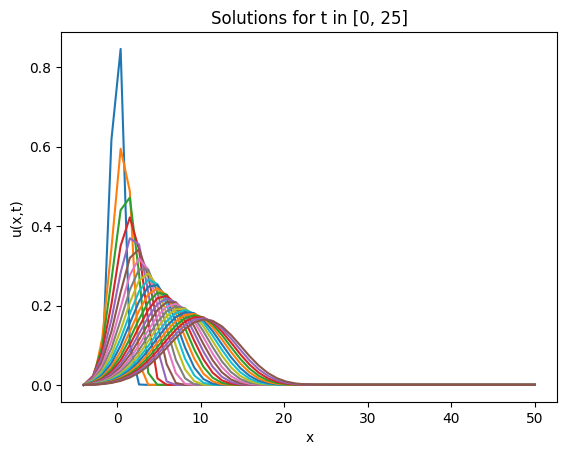

In [3]:
# setting things up 
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp

# distance 
xmin = -4 
xmax = 50 
xN = 50
deltaX = (xmax - xmin) / xN 
# give me xN evenly spaced numbers ranging from xmin to xmax as a vector 
xvals = np.linspace(xmin, xmax, xN) 

# time 
tmin = 0
tmax = 5
tN = 25
deltaT = (tmax - tmin) / tN

# initial condition
# this is not normal, we don't care that this is not exactly a pdf, behavior will be the same 
u0 = np.exp(-(xvals/1)**2)

# now plot, change xN to sample more points!
# our solution at t = 0 
fig,ax1 = plt.subplots()
ax1.plot(xvals, u0, "o") # this means plot points 
ax1.plot(xvals, u0, "-") # this means plot a line
ax1.set_xlabel("x") 
ax1.set_ylabel("u(x,0)") 
ax1.set_title("Solution for t = 0")

# advection and diffusion speeds 
c = 2
a = 1

# ---------------------------------------------------------------

# how do we go forward? Algebra! Use the difference quotient 
# let the terms u(a, T + delta(t)) be unknown. Solve for those and we can move forward in time!

# run one time step of the solver
# ucurrent is the time step we are currently using to estimate the next 
def oneStep(ucurrent): 
    unew = 0 * ucurrent
    for j in range(unew.size) : 
        if j == 0: # left boundary 
            unew[j] = 0
        elif j == unew.size-1: # right boundary
            # we do not have a right point here!  
            # previous and current point  
            pl = ucurrent[j-1]
            pc = ucurrent[j] 
            # compute components of difference quotient 
            unew[j] = pc 
            unew[j] -= c*deltaT/deltaX * (pc - pl) 
            unew[j] += a * deltaT/deltaX**2 * (0 - 2*pc + pl)
        else: 
            # get the points we need to find the new points at the next time step 
            pl = ucurrent[j-1]
            pc = ucurrent[j]
            pr = ucurrent[j+1] 
            # compute the components of our difference quotient 
            unew[j] = pc 
            unew[j] -= c*deltaT/deltaX * (pc - pl) 
            unew[j] += a * deltaT/deltaX**2 * (pr - 2*pc + pl)
    return unew

fig,ax2 = plt.subplots()
ax2.plot(xvals,u0)
u = u0
for tj in range(tN): 
    u = oneStep(u)
    ax2.plot(xvals, u, '-', label="time %.4f"%(tj*deltaT))
    ax2.set_xlabel("x")
    ax2.set_ylabel("u(x,t)")
    ax2.set_title("Solutions for t in [0, 25]")

### 3. Spectral Methods

### 4. Swimmer Agents 

### 5. Challenges

### 6. Conclusion